<a href="https://colab.research.google.com/github/prashantmane091318/Computer_Vision/blob/main/Cancer_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator=ImageDataGenerator(rescale = 255.0,
                                   rotation_range = 30,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.5,
                                   zoom_range = 0.5
                                   )

In [ ]:
image_read=image_generator.flow_from_directory("/content/drive/My Drive/Colab Notebooks/Dataset",target_size=(224,224),batch_size=6668,class_mode="categorical",shuffle=True)

Found 6668 images belonging to 6 classes.


In [ ]:
x,y=next(image_read)

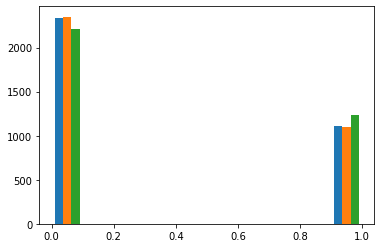

In [ ]:
import matplotlib.pyplot as plt
plt.hist(y, 10)
plt.show()


In [ ]:
x=pd.DataFrame(image_read)

In [ ]:
x.to_csv("/content/drive/My Drive/Colab Notebooks/data.csv",sep=",")

AttributeError: ignored

In [ ]:
y[-1]

array([0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
x.shape, y.shape

((3450, 224, 224, 3), (3450, 3))

In [ ]:
from sklearn.utils import shuffle
x,y=shuffle(x,y)

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
x=np.sum(x/3, axis=3,keepdims=3)

In [ ]:
x=(x-128)/128

In [ ]:
x

array([[[[163.02344],
         [163.02344],
         [163.02344],
         ...,
         [183.53763],
         [199.24179],
         [218.86337]],

        [[163.02344],
         [163.02344],
         [163.02344],
         ...,
         [210.57413],
         [231.37152],
         [240.53767]],

        [[163.02344],
         [163.02344],
         [163.02344],
         ...,
         [238.00015],
         [244.3667 ],
         [242.14755]],

        ...,

        [[223.45099],
         [241.27731],
         [257.33102],
         ...,
         [204.5744 ],
         [238.37915],
         [269.964  ]],

        [[251.24097],
         [266.5207 ],
         [272.7791 ],
         ...,
         [200.29587],
         [222.58151],
         [259.11447]],

        [[271.59494],
         [274.56598],
         [271.9828 ],
         ...,
         [209.24254],
         [207.31746],
         [246.60803]]],


       [[[260.7218 ],
         [256.48206],
         [258.39954],
         ...,
         [353.88

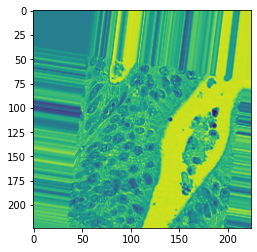

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(np.reshape(x[0],(224,224)))

In [ ]:
y[0].argmax()

2

In [ ]:
image_read.class_indices

{'LYM': 0, 'NORM': 1, 'TUM': 2}

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [ ]:
model.add(Conv2D(16,(5,5),activation="relu",input_shape=(224,224,3),))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Conv2D(32,(5,5),activation="relu"))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128,activation="relu"))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(64,activation="relu"))

In [ ]:
model.add(Dropout(0.5))

In [ ]:
model.add(Dense(9,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 220, 220, 16)      1216      
_________________________________________________________________
dropout (Dropout)            (None, 220, 220, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      12832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 106, 106, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 89888)             0

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.fit_generator(image_read,epochs=10,verbose=5)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


In [ ]:
image_read_test=image_generator.flow_from_directory("/content/drive/My Drive/Colab Notebooks/Test2",target_size=(224,224),batch_size=341,class_mode="categorical",shuffle=False)

Found 341 images belonging to 9 classes.


In [ ]:
xtest,ytest=next(image_read_test)

In [ ]:
xtest.shape,ytest.shape

((341, 224, 224, 3), (341, 9))

In [ ]:
#import numpy as np
xtest=np.sum(xtest/3, axis=3,keepdims=3)

In [ ]:
xtest=(xtest-128)/128

In [ ]:
xtest.shape

(341, 224, 224, 1)

In [ ]:
model.evaluate(xtest,ytest)

11/11 [==============================] - 0s 10ms/step - loss: 1.1442 - accuracy: 0.6334


[1.144228219985962, 0.633431077003479]

In [ ]:
image_test=image_generator.flow_from_directory("/content/drive/My Drive/Colab Notebooks/Test",target_size=(224,224),shuffle=False)

Found 17 images belonging to 1 classes.


In [ ]:
x,y=next(image_test)

In [ ]:
x[0].shape

(224, 224, 3)

In [ ]:
y.shape

(17, 1)

In [ ]:
x=np.sum(x/3, axis=3,keepdims=3)

In [ ]:
x=(x-128)/128

In [ ]:
y_predict=[]
for i in range(0, len(x)):
    y_predict.append(model.predict_classes(x[i].reshape((1,)+x[i].shape))[0])
print(y_predict)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[4, 0, 1, 1, 1, 3, 3, 4, 4, 5, 8, 5, 4, 6, 4, 5, 8]


In [ ]:
model.save("model1.h5")

In [ ]:
model1=load_model("model1.h5")

In [ ]:
from tensorflow.keras.models import load_model

**To Save model**

In [ ]:
import pickle
fname="cancer1.sav"


In [ ]:
f=open(fname,mode='w')
pickle.dump(model,f)

NameError: ignored

**To Load model**

In [ ]:
loaded_model = pickle.load(""/content/cancer1.sav", 'r'")
result = loaded_model.score(X_test, Y_test)
print(result)

TypeError: ignored

In [ ]:
from sklearn.metrics import confusion_metrics

# **Extra code**

In [ ]:
pp=x/255.0

In [ ]:
ppq=tf.image.rgb_to_grayscale(pp)

In [ ]:
pqp=tf.image.grayscale_to_rgb(ppq)

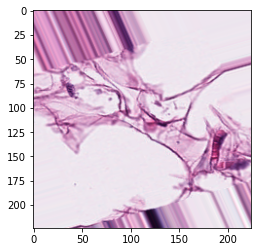

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(pp[0])

In [ ]:
model.predict_classes(pp)

array([0, 0, 1, 1, 1, 1, 5, 1, 1, 5, 5, 5, 4, 6, 1, 5, 5])

In [ ]:
image_generator.flow_from_dataframe()

In [ ]:
import cv2

In [ ]:
img=cv2.imread("/content/drive/My Drive/Colab Notebooks/Dataset/NORM/NORM-TCGA-AFDFLMWV.tif")

In [ ]:
img=img/255.0

In [ ]:
img=cv2.resize(img,(224,224))

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
model.predict_classes(img.reshape(1,224,224,3))

array([4])

In [ ]:
img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [ ]:
img=cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

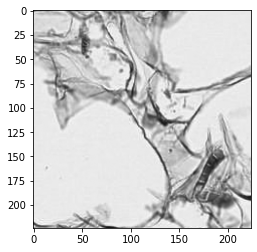

In [ ]:
plt.imshow(img)

In [ ]:
imag_test2=image_generator.flow_from_directory("/content/drive/My Drive/Dataset/data/Test2",target_size=(224,224),class_mode="categorical",shuffle=true,batch_size=341)

Found 341 images belonging to 9 classes.


In [ ]:
p,q=next(imag_test2)

In [ ]:
p=p/255.0

In [ ]:
pa=tf.image.rgb_to_grayscale(p)

In [ ]:
paa=tf.image.grayscale_to_rgb(pa)

In [ ]:
paa.shape

TensorShape([341, 224, 224, 3])

In [ ]:
model.evaluate(paa,q)

11/11 [==============================] - 0s 30ms/step - loss: 2.4179 - accuracy: 0.2991


[2.4179365634918213, 0.2991202473640442]

In [ ]:
# keras imports for the dataset and building our neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score



In [ ]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')



In [ ]:
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)



Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))



In [ ]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 25)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16900)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1690100   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 1,691,360
Trainable params: 1,691,360
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# training the model for 10 epochs
model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1944 - accuracy: 0.9441 - val_loss: 0.0804 - val_accuracy: 0.9754
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0610 - accuracy: 0.9822 - val_loss: 0.0578 - val_accuracy: 0.9799
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0377 - accuracy: 0.9884 - val_loss: 0.0549 - val_accuracy: 0.9813
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.0526 - val_accuracy: 0.9824
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.0586 - val_accuracy: 0.9820
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0107 - accuracy: 0.9970 - val_loss: 0.0607 - val_accuracy: 0.9823
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.0639 - val_accuracy: 0.9805
Epoch 

In [ ]:
from sklearn.metrics import  confusion_matrix

In [ ]:
cmt=confusion_matrix(y,y_predict)

ValueError: ignored